# Case Study: How Can a Wellness Technology Company Play It Smart?

#### The case study follows the six step data analysis process:
❓ Ask
💻 Prepare
🛠 Process
📊 Analyze
📋 Share
🧗‍Act

### Case Study description

Bellabeat is a high-tech manufacturer of health-focused products for women. Collecting data on activity, sleep, stress, and reproductive health empowers women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

The purpose of the case study is to analyze smart device fitness data to gain insight into how consumers use their smart devices. The insights will help unlock new growth opportunities for the company.

### 1. Ask

#### 1. Business Task

This is a case study for Bellabeat - a high-tech design and manufacturing company that produces health-focused smart devices for women. The goal of this report is to provide an analysis of how consumers are using their smart devices The insight gained from analyzing this data will be used to make recommendation for Bellabeat products to grow the business. Throughout the analysis attemp to answer these questions:

* What are some trends in Fitbit smart device usage?
* How could these trends apply to Bellabeat customers and help influence Bellabeat marketing strategy?

#### 2. Key Stakeholders

* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team 
* Bellabeat marketing analytics team: A team of data analysts to help guide Bellabeat’s marketing strategy

#### Limitations:
* Most users did not share their weight information. which made analysing weight trends impossible
* The main aspect for health-focused smart devices specially for women is missing; No information of women related fields like tracking menstrual cycle,fertile window (great way of understanging body and unique aspect of health and cycle

### 2. Prepare

Data Source: 30 participants FitBit Fitness Tracker 
Data from Mobius: https://www.kaggle.com/arashnic/fitbit

The dataset has 18 CSV. The data also follow a ROCCC approach:

* **Reliability**: The data is from 30 responders are a small sample size and does not accurately reflect the entire population of female Fitbit users (LOW)
* **Original**: The data is from 30 FitBit users who consented to the submission of personal tracker data via Amazon Mechanical Turk, which is a Third Party data provider (LOW)
* **Comprehensive**: While the data tracks many factors in the user activity and sleep, but the sample size is small and most data is recorded during certain days of the week; The dataset does not consist of data about gender, age, health conditions and it is not random; The data is biased against women; Low accuracy does not represent the case objectively (LOW)
* **Current**: Data is from March 2016 to May 2016. Data is not current so the users habit may have changed (LOW)
* **Cited**: Data obtained from an unidentified third party (Amazon Mechanical Murk) (LOW)

#### Limitations:

* Only 30 user data is available. The central limit theorem general rule of n≥30 applies and we can use the t test for statstic reference. However, a larger sample size is preferred for the analysis.
* Upon further investigation with n_distinct() to check for unique user Id, the set has 33 user data from daily activity, 24 from sleep and only 8 from weight. There are 3 extra users and some users did not record their data for tracking daily activity and sleep.
* For the 8 user data for weight, 5 users manually entered their weight and 3 recorded via a connected wifi device (eg: wifi scale).
* Most data is recorded from Tuesday to Thursday, which may not be comprehensive enough to form an accurate analysis.

### 3. Process

#### Installing and loading common packages and libraries

We will install and load all the necessary packages and libraries that we will need for our analysis

In [1]:
## Setting up my R environment by loading packages and libraries

install.packages('tidyverse')
install.packages('skimr')
install.packages('cowplot')
install.packages("plotly")

library(plotly)
library(tidyverse) #wrangle data
library(dplyr) #clean data
library(lubridate)  #wrangle date attributes
library(skimr) #get summary data
library(ggplot2) #visualize data
library(cowplot) #grid the plot
library(readr) #save csv 
library(plotly) #pie chart

Installing package into 'C:/Users/RAJNISH KUMAR/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\RAJNISH KUMAR\AppData\Local\Temp\RtmpsfJRC6\downloaded_packages


Installing package into 'C:/Users/RAJNISH KUMAR/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'skimr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\RAJNISH KUMAR\AppData\Local\Temp\RtmpsfJRC6\downloaded_packages


Installing package into 'C:/Users/RAJNISH KUMAR/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'cowplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\RAJNISH KUMAR\AppData\Local\Temp\RtmpsfJRC6\downloaded_packages


Installing package into 'C:/Users/RAJNISH KUMAR/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'plotly' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\RAJNISH KUMAR\AppData\Local\Temp\RtmpsfJRC6\downloaded_packages


Loading required package: ggplot2


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks plotly::filter(), stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp




#### Uploading the CSV files to R :

The Dataset we are using comes from public dataset that contains multiple csv files: https://www.kaggle.com/arashnic/fitbit

#### Datasets

For this project, we will import datasets daily_activity, sleepdat_merged, weightloginfo_merged,  heartrate_seconds_merged

In [2]:
daily_activity <- read.csv("dailyActivity_merged.csv")
sleep_day <- read.csv("sleepDay_merged.csv")
weight <- read.csv("weightLogInfo_merged.csv")
hourly_step <- read.csv("hourlySteps_merged.csv")

head(daily_activity)
head(sleep_day)
head(weight)

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366 4/12/2016    13162      8.50          8.50           
2 1503960366 4/13/2016    10735      6.97          6.97           
3 1503960366 4/14/2016    10460      6.74          6.74           
4 1503960366 4/15/2016     9762      6.28          6.28           
5 1503960366 4/16/2016    12669      8.16          8.16           
6 1503960366 4/17/2016     9705      6.48          6.48           
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1 0                        1.88               0.55                    
2 0                        1.57               0.69                    
3 0                        2.44               0.40                    
4 0                        2.14               1.26                    
5 0                        2.71               0.41                    
6 0                        3.19               0.78                    
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1 6.06                0                       25               
2 4.71                0                       21               
3 3.91                0                       30               
4 2.83                0                       29               
5 5.04                0                       36               
6 2.51                0                       38               
  FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes Calories
1 13                  328                   728             1985    
2 19                  217                   776             1797    
3 11                  181                  1218             1776    
4 34                  209                   726             1745    
5 10                  221                   773             1863    
6 20                  164                   539             1728

Id         SleepDay              TotalSleepRecords TotalMinutesAsleep
1 1503960366 4/12/2016 12:00:00 AM 1                 327               
2 1503960366 4/13/2016 12:00:00 AM 2                 384               
3 1503960366 4/15/2016 12:00:00 AM 1                 412               
4 1503960366 4/16/2016 12:00:00 AM 2                 340               
5 1503960366 4/17/2016 12:00:00 AM 1                 700               
6 1503960366 4/19/2016 12:00:00 AM 1                 304               
  TotalTimeInBed
1 346           
2 407           
3 442           
4 367           
5 712           
6 320

Id         Date                  WeightKg WeightPounds Fat BMI  
1 1503960366 5/2/2016 11:59:59 PM   52.6    115.9631     22  22.65
2 1503960366 5/3/2016 11:59:59 PM   52.6    115.9631     NA  22.65
3 1927972279 4/13/2016 1:08:52 AM  133.5    294.3171     NA  47.54
4 2873212765 4/21/2016 11:59:59 PM  56.7    125.0021     NA  21.45
5 2873212765 5/12/2016 11:59:59 PM  57.3    126.3249     NA  21.69
6 4319703577 4/17/2016 11:59:59 PM  72.4    159.6147     25  27.45
  IsManualReport LogId       
1 True           1.462234e+12
2 True           1.462320e+12
3 False          1.460510e+12
4 True           1.461283e+12
5 True           1.463098e+12
6 True           1.460938e+12

### Cleaning data

Before analysis, the data must be checked for duplicates, misspellings, missing values, errors.

weight_info data frame has missing values. To show just records with filled values we can remove the whole column “Fat” as there is no information for the insights or we can display all columns without “Fat” column.

In [3]:
#Check for NA and duplicates

sum(is.na(daily_activity))
sum(is.na(sleep_day))
sum(is.na(weight))


[1] 0

[1] 0

[1] 65

In [4]:
sum(duplicated(daily_activity))
sum(duplicated(sleep_day))
sum(duplicated(weight))

[1] 0

[1] 3

[1] 0

In [5]:
#We will leave the NA. The NA belong to "Fat" data of different dates. 
#Remove duplicates.

sleep_day <- sleep_day[!duplicated(sleep_day), ]
sum(duplicated(sleep_day))

[1] 0

In [6]:
#Convert ActivityDate into date format and add a column for day of the week:

daily_activity <- daily_activity %>% mutate( Weekday = weekdays(as.Date(ActivityDate, "%m/%d/%Y")))


In [7]:
merged1 <- merge(daily_activity,sleep_day,by = c("Id"), all=TRUE)
merged_data <- merge(merged1, weight, by = c("Id"), all=TRUE)

In [8]:
#Order from Monday to Sunday for plot later

merged_data$Weekday <- factor(merged_data$Weekday, levels= c("Monday", 
    "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

In [9]:
merged_data[order(merged_data$Weekday), ]

Id         ActivityDate TotalSteps TotalDistance TrackerDistance
69    1503960366 4/18/2016    13019      8.59          8.59           
70    1503960366 4/18/2016    13019      8.59          8.59           
71    1503960366 4/18/2016    13019      8.59          8.59           
72    1503960366 4/18/2016    13019      8.59          8.59           
73    1503960366 4/18/2016    13019      8.59          8.59           
74    1503960366 4/18/2016    13019      8.59          8.59           
81    1503960366 4/18/2016    13019      8.59          8.59           
82    1503960366 4/18/2016    13019      8.59          8.59           
89    1503960366 4/18/2016    13019      8.59          8.59           
90    1503960366 4/18/2016    13019      8.59          8.59           
91    1503960366 4/18/2016    13019      8.59          8.59           
92    1503960366 4/18/2016    13019      8.59          8.59           
93    1503960366 4/18/2016    13019      8.59          8.59           
94    1503960366 4/18/2016    13019      8.59          8.59           
95    1503960366 4/18/2016    13019      8.59          8.59           
96    1503960366 4/18/2016    13019      8.59          8.59           
97    1503960366 4/18/2016    13019      8.59          8.59           
98    1503960366 4/18/2016    13019      8.59          8.59           
99    1503960366 4/18/2016    13019      8.59          8.59           
100   1503960366 4/18/2016    13019      8.59          8.59           
101   1503960366 4/18/2016    13019      8.59          8.59           
102   1503960366 4/18/2016    13019      8.59          8.59           
103   1503960366 4/18/2016    13019      8.59          8.59           
104   1503960366 4/18/2016    13019      8.59          8.59           
105   1503960366 4/18/2016    13019      8.59          8.59           
106   1503960366 4/18/2016    13019      8.59          8.59           
163   1503960366 4/18/2016    13019      8.59          8.59           
164   1503960366 4/18/2016    13019      8.59          8.59           
165   1503960366 4/18/2016    13019      8.59          8.59           
166   1503960366 4/18/2016    13019      8.59          8.59           
⋮     ⋮          ⋮            ⋮          ⋮             ⋮              
43072 8877689391 5/1/2016     10930      8.32          8.32           
43073 8877689391 5/1/2016     10930      8.32          8.32           
43074 8877689391 5/1/2016     10930      8.32          8.32           
43075 8877689391 5/1/2016     10930      8.32          8.32           
43076 8877689391 5/1/2016     10930      8.32          8.32           
43077 8877689391 5/1/2016     10930      8.32          8.32           
43222 8877689391 5/8/2016     10686      8.11          8.11           
43223 8877689391 5/8/2016     10686      8.11          8.11           
43224 8877689391 5/8/2016     10686      8.11          8.11           
43225 8877689391 5/8/2016     10686      8.11          8.11           
43226 8877689391 5/8/2016     10686      8.11          8.11           
43227 8877689391 5/8/2016     10686      8.11          8.11           
43228 8877689391 5/8/2016     10686      8.11          8.11           
43229 8877689391 5/8/2016     10686      8.11          8.11           
43230 8877689391 5/8/2016     10686      8.11          8.11           
43231 8877689391 5/8/2016     10686      8.11          8.11           
43232 8877689391 5/8/2016     10686      8.11          8.11           
43233 8877689391 5/8/2016     10686      8.11          8.11           
43234 8877689391 5/8/2016     10686      8.11          8.11           
43235 8877689391 5/8/2016     10686      8.11          8.11           
43236 8877689391 5/8/2016     10686      8.11          8.11           
43237 8877689391 5/8/2016     10686      8.11          8.11           
43238 8877689391 5/8/2016     10686      8.11          8.11           
43239 8877689391 5/8/2016     10686      8.11          8.11           
43240 8877689391 5/8/2016     

In [10]:
#Save CSV for Tableau presentation

write_csv(merged_data, "merged_data.csv")

In [11]:
#Check for NA and duplicates in merged data. 

sum(is.na(merged_data))
sum(duplicated(merged_data))
n_distinct(merged_data$Id)

[1] 98978

[1] 0

[1] 33

###### Examine the dataset and check if all 30 users are unique. 

In [12]:
#Check to see if all users are unique.
#We supposed to have 30 users or 30 IDs. 
#So We have 3 extra from daily activity, 6 less from the sleep day table, and 22 less from the weight table. 

n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)
n_distinct(weight$Id)

[1] 33

[1] 24

[1] 8

In [13]:
#Since weight table only has 8 users enter their information. 
#Let's take a look at how they enter the information. 
#5 users are manually reporting the weight and 3 uers are reporting it with a connected device - wifi connected scale. 

weight %>% 
  filter(IsManualReport == "True") %>% 
  group_by(Id) %>% 
  summarise("Manual Weight Report"=n()) %>%
  distinct()


Id         Manual Weight Report
1 1503960366  2                  
2 2873212765  2                  
3 4319703577  2                  
4 4558609924  5                  
5 6962181067 30

Additional insight to be checked for, is how often user record their data. We can see from the ggplot() bar graph that the data are greatest from Tuesday to Thursday. We need to investigate the data recording distribution. Monday and Friday are both weekdays, why isn't the data recordings as much as the other weekdays?

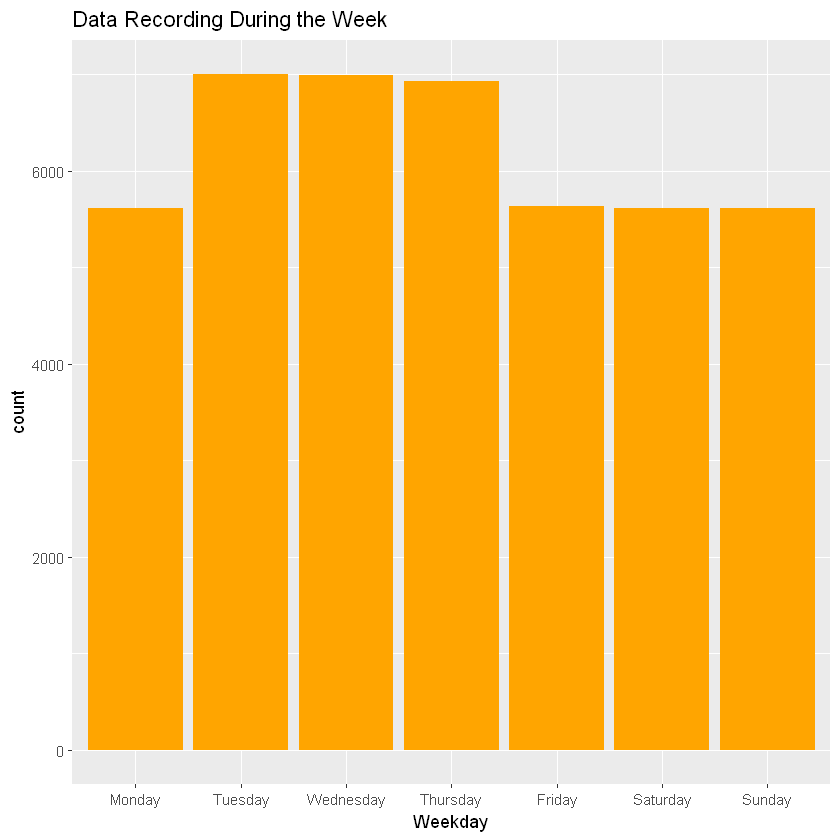

In [14]:
ggplot(data=merged_data, aes(x=Weekday))+
  geom_bar(fill="orange")+
  labs(title="Data Recording During the Week")

###### Weekly and hourly summary

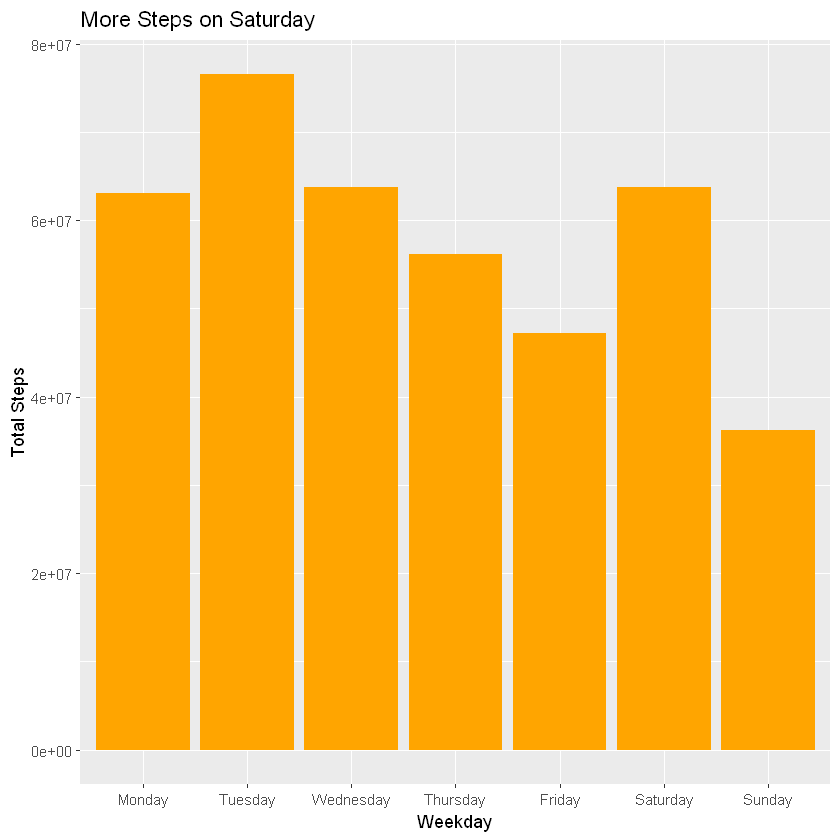

In [15]:
#Weekly

ggplot(data=merged_data, aes(x=Weekday, y=TotalSteps, fill=Weekday))+ 
  geom_bar(stat="identity", fill="orange")+
  labs(title="More Steps on Saturday", y="Total Steps")

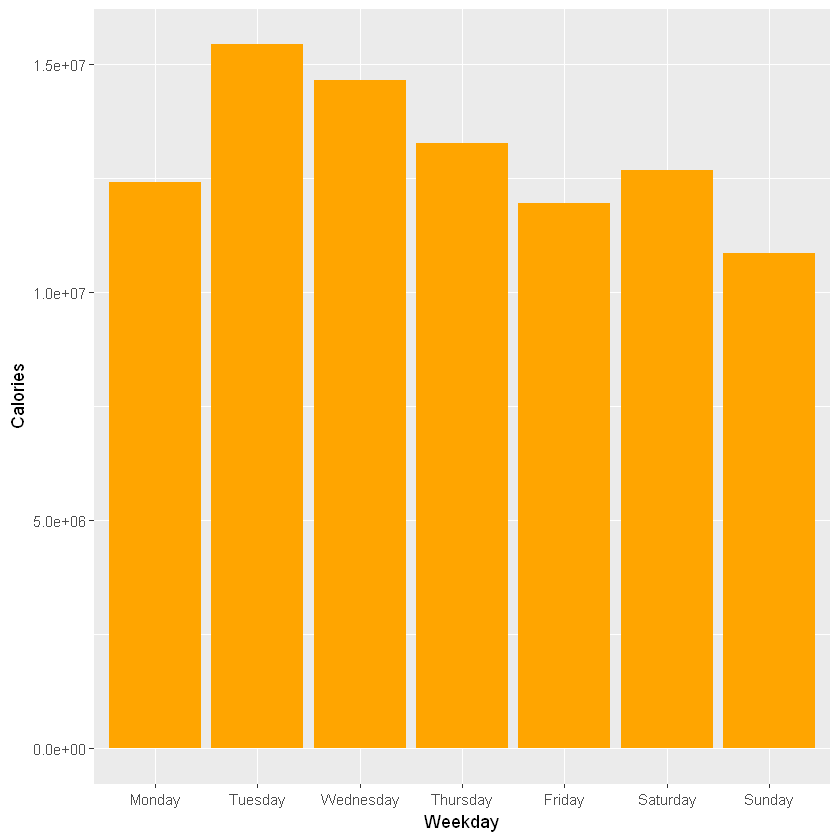

In [16]:
ggplot(data=merged_data, aes(x=Weekday, y=Calories, fill=Weekday))+ 
  geom_bar(stat="identity", fill="orange")

From weekday's total asleep minutes, we can see the graph look almost same as the graph above! We can confirmed that most sleep data is also recorded during Tuesday to Thursday. This raised a question "how comprehensive are the data to form an accurate analysis?"

The bar graph shows that there is a jump on Saturday: user spent LESS time in sedentary minutes and take MORE steps. Users are out and about on Saturday.

Warning message:
"Removed 971 rows containing missing values or values outside the scale range (`geom_bar()`)."


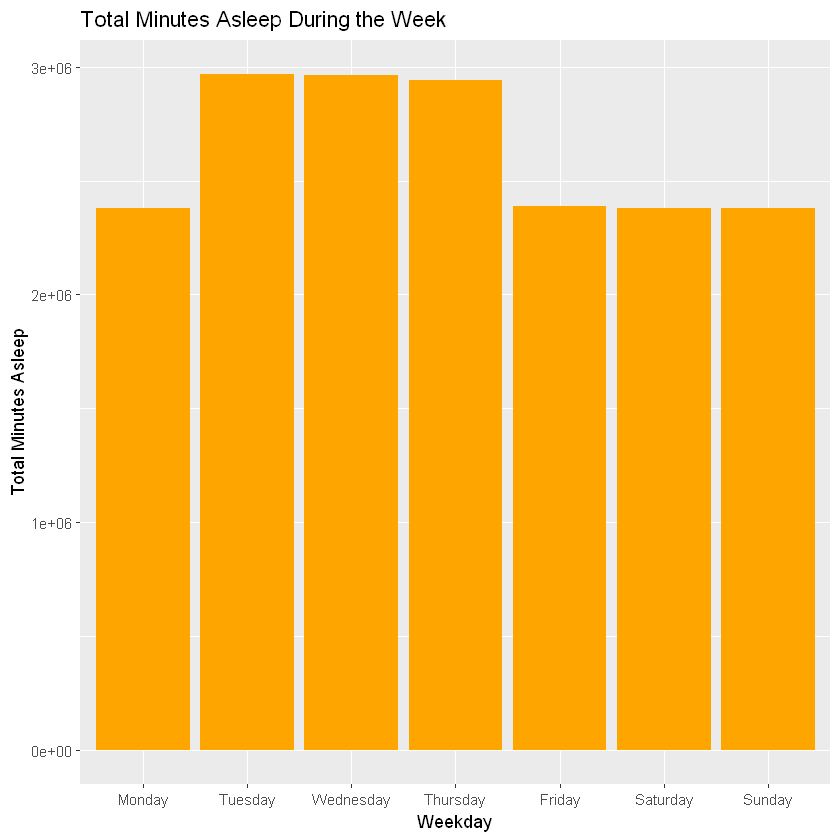

In [17]:
ggplot(data=merged_data, aes(x=Weekday, y=TotalMinutesAsleep, fill=Weekday))+ 
  geom_bar(stat="identity", fill="orange")+
  labs(title="Total Minutes Asleep During the Week", y="Total Minutes Asleep")

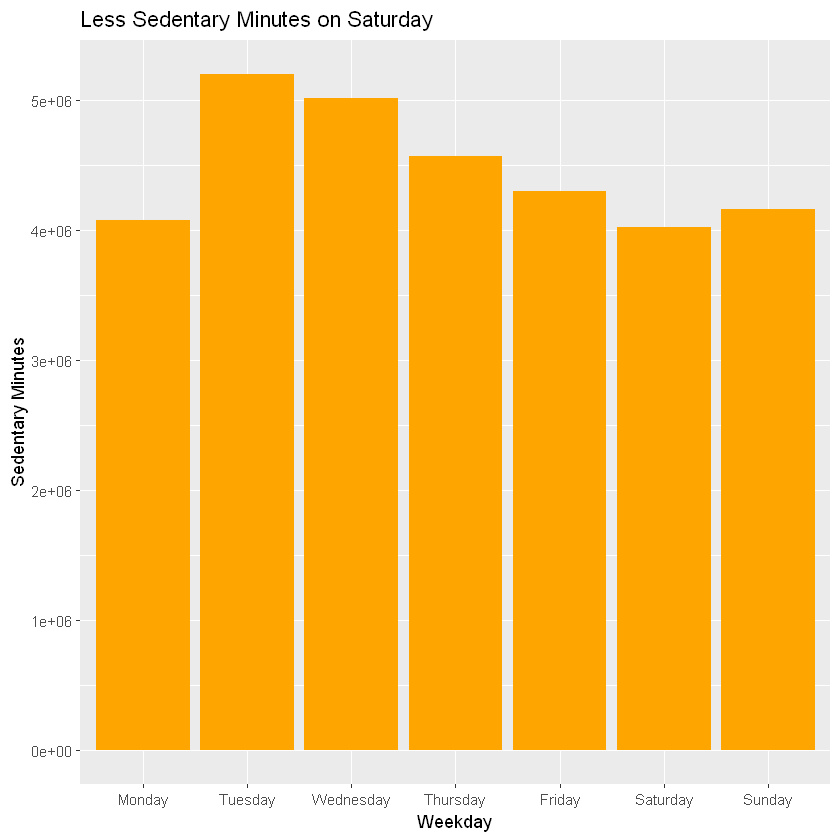

In [18]:
ggplot(data=merged_data, aes(x=Weekday, y=SedentaryMinutes, fill=Weekday))+ 
  geom_bar(stat="identity", fill="orange")+
  labs(title="Less Sedentary Minutes on Saturday", y="Sedentary Minutes")

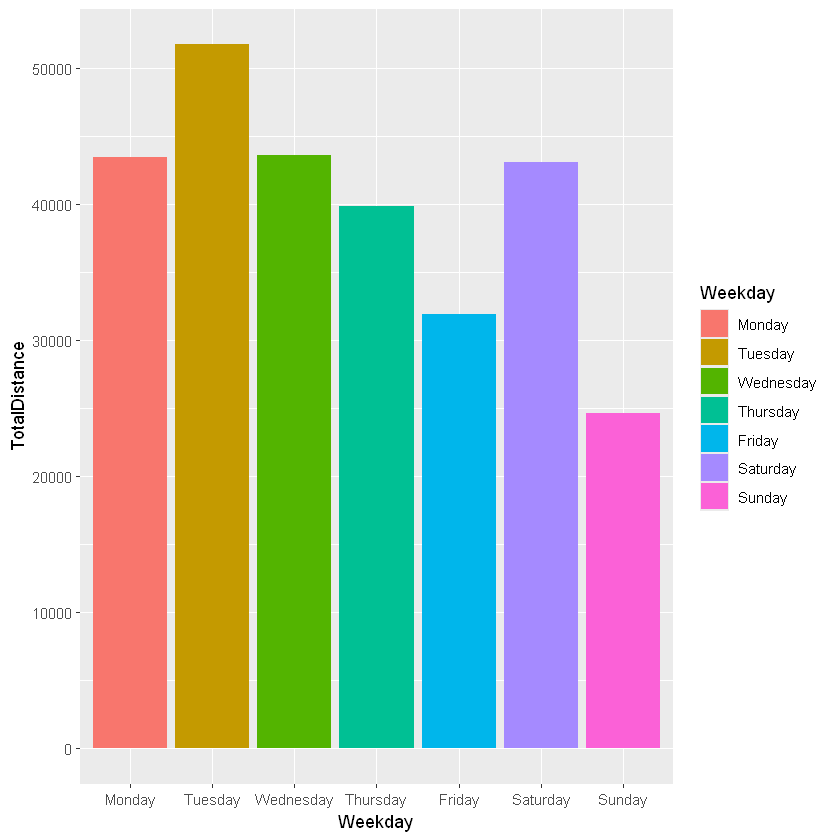

In [19]:
ggplot(data=merged_data, aes(x=Weekday, y=TotalDistance, fill=Weekday))+ 
  geom_bar(stat="identity")

In [20]:
#Hourly

head(hourly_step)
n_distinct(hourly_step$Id) #33 users

Id         ActivityHour          StepTotal
1 1503960366 4/12/2016 12:00:00 AM 373      
2 1503960366 4/12/2016 1:00:00 AM  160      
3 1503960366 4/12/2016 2:00:00 AM  151      
4 1503960366 4/12/2016 3:00:00 AM    0      
5 1503960366 4/12/2016 4:00:00 AM    0      
6 1503960366 4/12/2016 5:00:00 AM    0

[1] 33

In [21]:
hourly_step$ActivityHour=as.POSIXct(hourly_step$ActivityHour,format="%m/%d/%Y %I:%M:%S %p")
hourly_step$Hour <-  format(hourly_step$ActivityHour,format= "%H")
head(hourly_step)

Id         ActivityHour        StepTotal Hour
1 1503960366 2016-04-12 00:00:00 373       00  
2 1503960366 2016-04-12 01:00:00 160       01  
3 1503960366 2016-04-12 02:00:00 151       02  
4 1503960366 2016-04-12 03:00:00   0       03  
5 1503960366 2016-04-12 04:00:00   0       04  
6 1503960366 2016-04-12 05:00:00   0       05

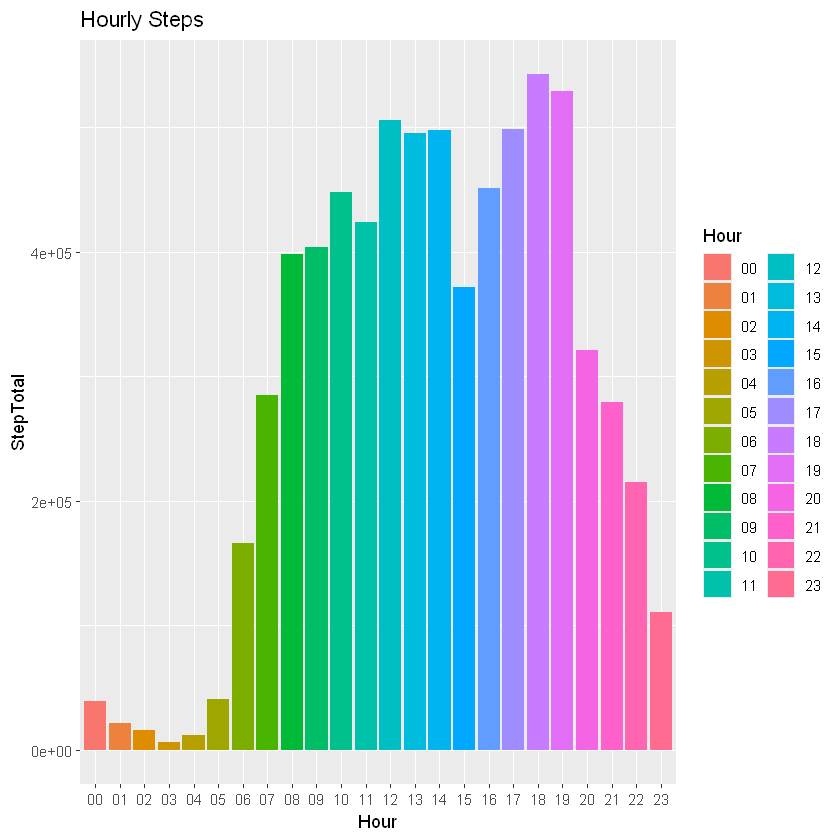

In [22]:
ggplot(data=hourly_step, aes(x=Hour, y=StepTotal, fill=Hour))+
  geom_bar(stat="identity")+
  labs(title="Hourly Steps")

### 4. Analyze

The best way to represent a set of numbers and see the central trend of the entire data set is to find the central value, the mean using summary() function.

###### Statistics summary mean, median, min, max for all 3 tables + merged data

In [23]:
daily_activity %>%
 dplyr::select(TotalSteps,
         TotalDistance,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         SedentaryMinutes,
         Calories) %>%
  summary()


   TotalSteps    TotalDistance    VeryActiveMinutes FairlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 7406   Median : 5.245   Median :  4.00    Median :  6.00     
 Mean   : 7638   Mean   : 5.490   Mean   : 21.16    Mean   : 13.56     
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00    3rd Qu.: 19.00     
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :143.00     
 LightlyActiveMinutes SedentaryMinutes    Calories   
 Min.   :  0.0        Min.   :   0.0   Min.   :   0  
 1st Qu.:127.0        1st Qu.: 729.8   1st Qu.:1828  
 Median :199.0        Median :1057.5   Median :2134  
 Mean   :192.8        Mean   : 991.2   Mean   :2304  
 3rd Qu.:264.0        3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :518.0        Max.   :1440.0   Max.   :4900  

In [24]:
sleep_day %>%  
  dplyr::select(TotalSleepRecords,
  TotalMinutesAsleep,
  TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

In [25]:
weight %>% 
  dplyr::select(WeightPounds, BMI) %>%
  summary()

  WeightPounds        BMI       
 Min.   :116.0   Min.   :21.45  
 1st Qu.:135.4   1st Qu.:23.96  
 Median :137.8   Median :24.39  
 Mean   :158.8   Mean   :25.19  
 3rd Qu.:187.5   3rd Qu.:25.56  
 Max.   :294.3   Max.   :47.54  

Checking for min, max, mean, median and any outliers. Avg weight is 135 pounds with BMI of 24 and burn 2050 calories. Avg steps is 10200, max is almost triple that 36000 steps. Users spend on avg 12 hours a day in sedentary minutes, 4 hours lightly active, only half hour in fairly+very active! Users also gets about 7 hour of sleep.

In [26]:
merged_data %>%
  dplyr::select(Weekday,
         TotalSteps,
         TotalDistance,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         SedentaryMinutes,
         Calories,
         TotalMinutesAsleep,
         TotalTimeInBed,
         WeightPounds,
         BMI
         ) %>%
  summary()

      Weekday       TotalSteps    TotalDistance    VeryActiveMinutes
 Monday   :5609   Min.   :    0   Min.   : 0.000   Min.   :  0.00   
 Tuesday  :7004   1st Qu.: 5832   1st Qu.: 3.910   1st Qu.:  0.00   
 Wednesday:6988   Median :10199   Median : 6.820   Median : 15.00   
 Thursday :6930   Mean   : 9373   Mean   : 6.415   Mean   : 23.57   
 Friday   :5632   3rd Qu.:12109   3rd Qu.: 8.350   3rd Qu.: 38.00   
 Saturday :5616   Max.   :36019   Max.   :28.030   Max.   :210.00   
 Sunday   :5610                                                     
 FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes    Calories   
 Min.   :  0.00      Min.   :  0.0        Min.   :   0.0   Min.   :   0  
 1st Qu.:  3.00      1st Qu.:194.0        1st Qu.: 637.0   1st Qu.:1850  
 Median : 14.00      Median :238.0        Median : 697.0   Median :2046  
 Mean   : 17.82      Mean   :232.2        Mean   : 722.6   Mean   :2103  
 3rd Qu.: 31.00      3rd Qu.:288.0        3rd Qu.: 745.0   3rd Qu.:2182  
 Max

###### Analysis on active minutes, calorie, total steps. The American Heart Association and World Health Organization recommend at least 150 minutes of moderate-intensity activity or 75 minutes of vigorous activity, or a combination of both, each week. That means it needs an daily goal of 21.4 minutes of FairlyActiveMinutes or 10.7 minutes of VeryActiveMinutes

In [27]:
#Active users

active_users <- daily_activity %>%
  filter(FairlyActiveMinutes >= 21.4 | VeryActiveMinutes>=10.7) %>% 
  group_by(Id) %>% 
  count(Id)

In [28]:
total_minutes <- sum(daily_activity$SedentaryMinutes, daily_activity$VeryActiveMinutes, daily_activity$FairlyActiveMinutes, daily_activity$LightlyActiveMinutes)
sedentary_percentage <- sum(daily_activity$SedentaryMinutes)/total_minutes*100
lightly_percentage <- sum(daily_activity$LightlyActiveMinutes)/total_minutes*100
fairly_percentage <- sum(daily_activity$FairlyActiveMinutes)/total_minutes*100
active_percentage <- sum(daily_activity$VeryActiveMinutes)/total_minutes*100


Percentage of active minutes in the four categories: very active, fairly active, lightly active and sedentary. From the pie chart, we can see that most users spent 81.3% of their daily activity in sedentary minutes and only 1.74% in very active minutes.

In [29]:
#Pie charts

percentage <- data.frame(
  level=c("Sedentary", "Lightly", "Fairly", "Very Active"),
  minutes=c(sedentary_percentage,lightly_percentage,fairly_percentage,active_percentage)
)

plot_ly(percentage, labels = ~level, values = ~minutes, type = 'pie',textposition = 'outside',textinfo = 'label+percent') %>%
  layout(title = 'Activity Level Minutes',
         xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
         yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))

HTML widgets cannot be represented in plain text (need html)

In [30]:
#How active are the users

active_minute <- daily_activity %>% 
  gather(key=Intensity, value=active_minutes, ends_with("minutes")) %>% 
  select(Intensity, active_minutes) 

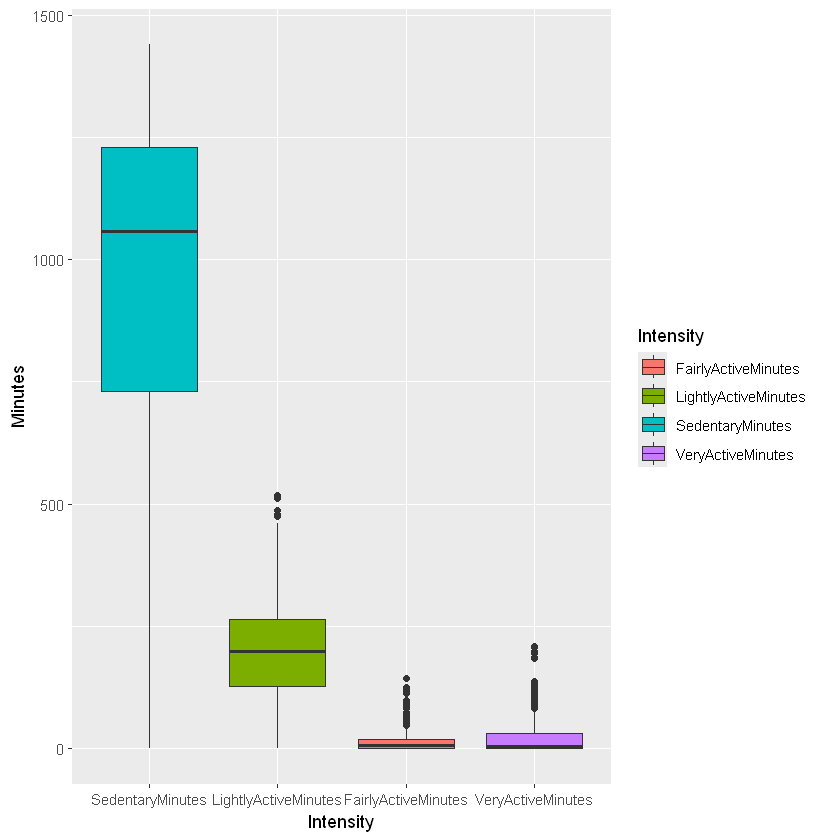

In [31]:
ggplot(data=active_minute, aes(x=Intensity, y=active_minutes))+
  geom_boxplot(aes(fill=Intensity))+
  scale_x_discrete(limits=c("SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"))+
  ylab("Minutes")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"


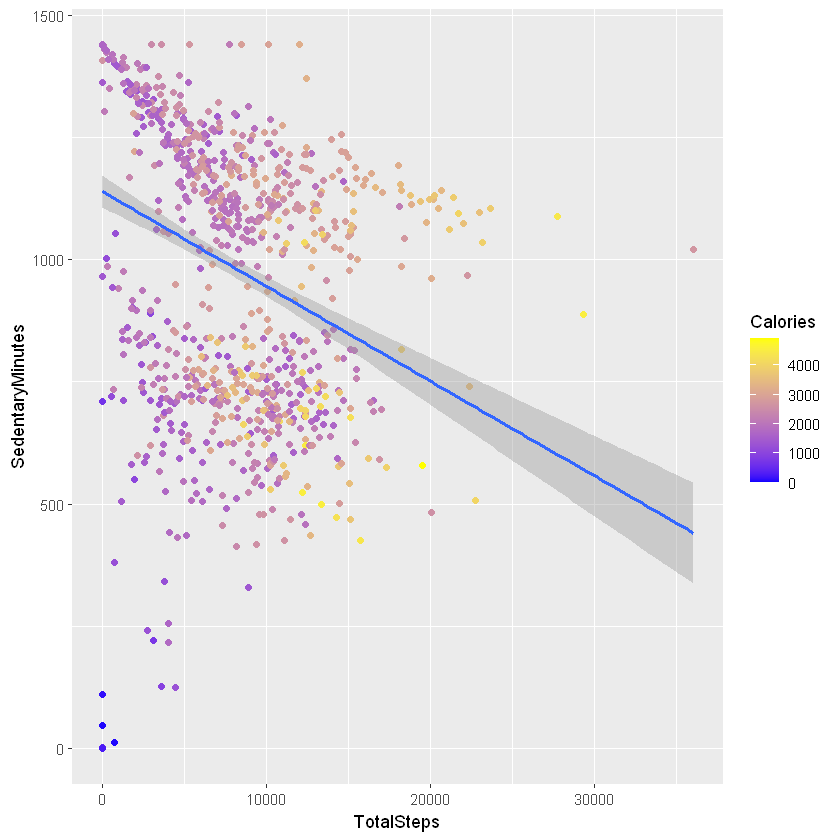

In [32]:
# Total steps vs Sedentary Minutes with Calories and Total Distance. 
# The two plots are very similar. 
# Users who are more active burn more calories. 
# Users who are sedentary take the less steps and burn less calories. 

par(mfrow = c(2, 2))
ggplot(data=daily_activity, aes(x=TotalSteps, y=SedentaryMinutes, color=Calories))+ 
  geom_point()+
  stat_smooth(method=lm)+
  scale_color_gradient(low="blue", high="yellow")

The more active that you're, the more steps you take, and the more calories you will burn. This is an obvious fact, but we can still look into the data to find any interesting. Here we see that some users who are sedentary, take minimal steps, but still able to burn over 1500 to 2500 calories compare to users who are more active, take more steps, but still burn similar calories.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"


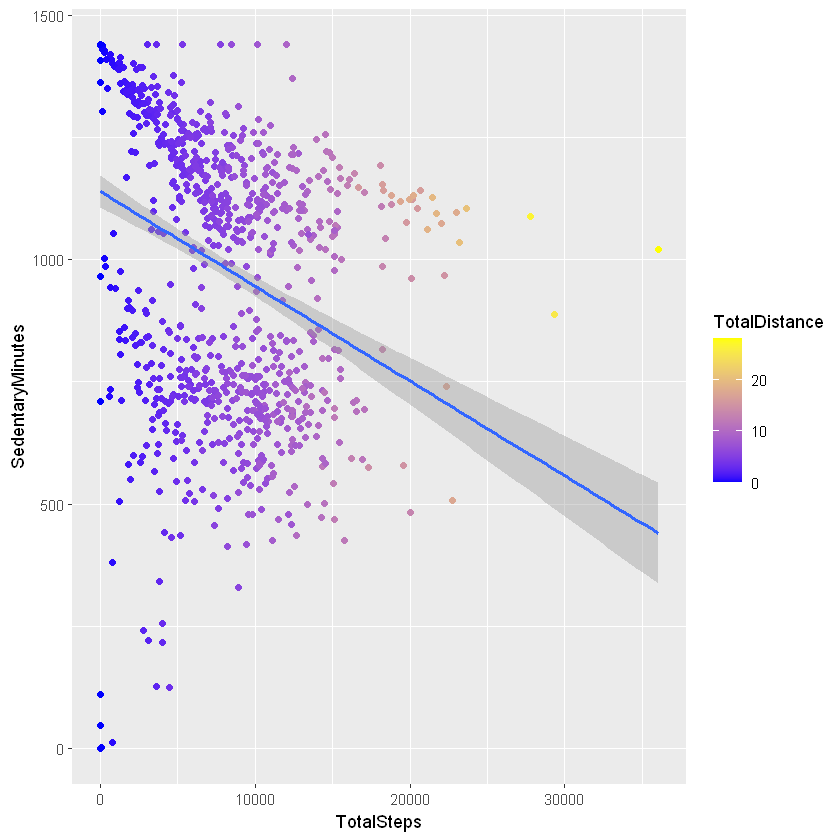

In [33]:
ggplot(data=daily_activity, aes(x=TotalSteps, y=SedentaryMinutes, color=TotalDistance))+ 
  geom_point()+
  stat_smooth(method=lm)+
  scale_color_gradient(low="blue", high="yellow")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"


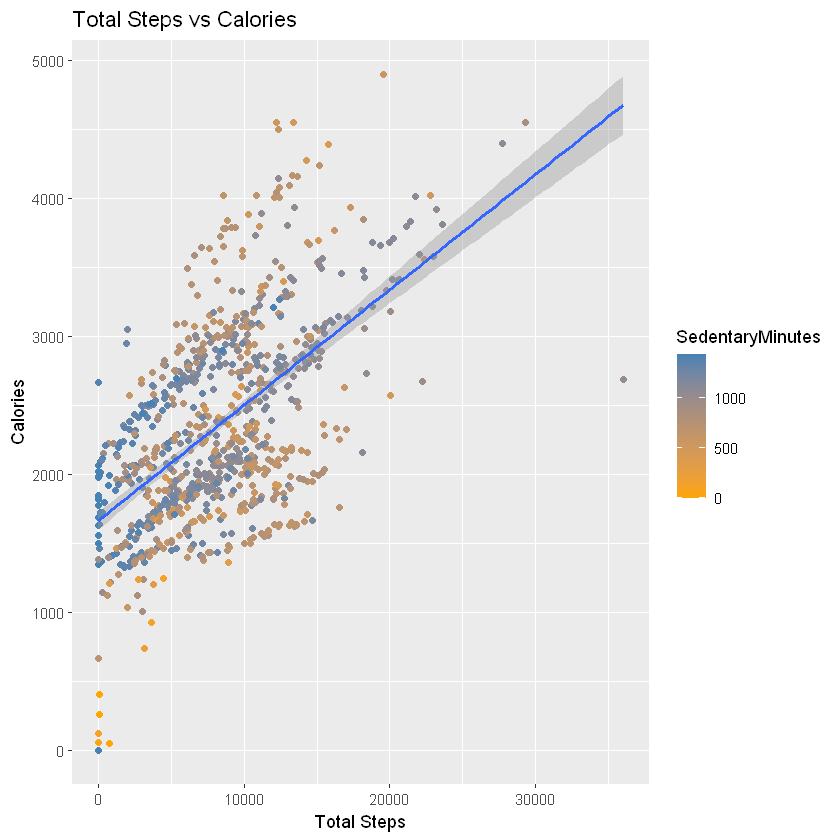

In [34]:
# Interesting find here that some user who are sedentary, takes minimal step, but still able to burn over 1500 to 2500 calories

ggplot(data=daily_activity, aes(x=TotalSteps, y = Calories, color=SedentaryMinutes))+ 
  geom_point()+ 
  labs(title="Total Steps vs Calories")+
  xlab("Total Steps")+
  stat_smooth(method=lm)+
  scale_color_gradient(low="orange", high="steelblue")


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 8881 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"
Warning message:
"Removed 8881 rows containing missing values or values outside the scale range (`geom_point()`)."


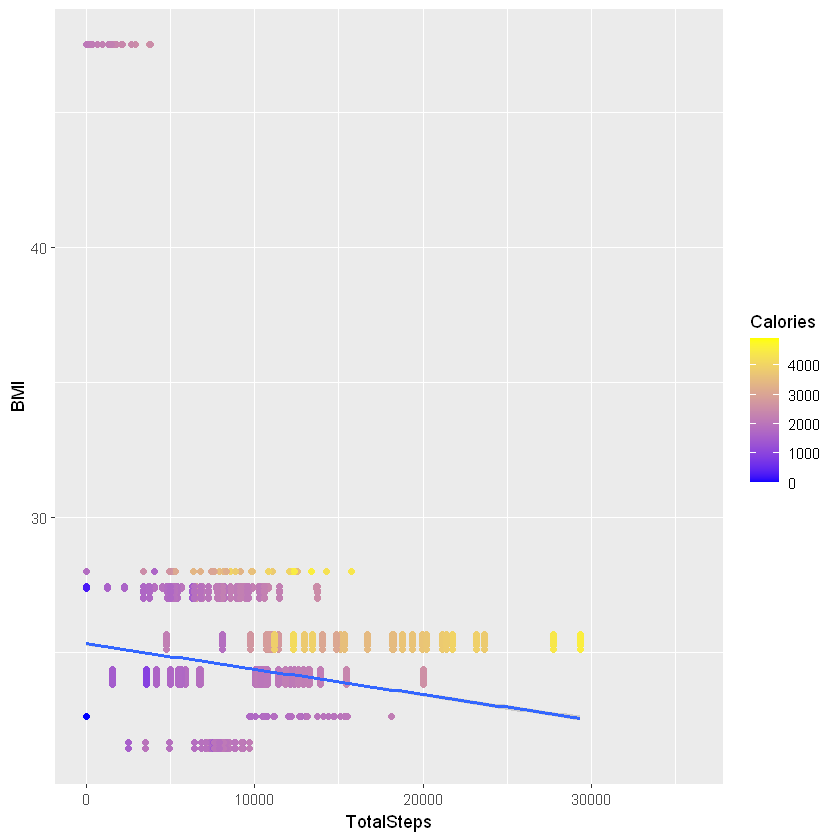

In [35]:
# Users who take more steps, burn more calories and has lower BMI. 

#We also see some outliers in the top left corner. 

ggplot(data=merged_data, aes(x=TotalSteps, y = BMI, color=Calories))+ 
  geom_point()+ 
  stat_smooth(method=lm)+
   scale_color_gradient(low="blue", high="yellow")


###### Regression analysis and R value, leverage points (lm.influence)

We can use regression analysis look at the variables and correlation. For R-squared, 0% indicates that the model explains none of the variability of the response data around its mean. Higher % indicates that the model explains more of the variability of the response data around its mean. Postive slope means variables increase/decrease with each other, and negative means one variable go up and the other go down. We want to look at if users who spend more time in sedentary minutes spend more time sleeping as well. We can use regression analysis lm() to check for the dependent and indepedent variables. We also find that how many minutes an user asleep have an very weak correlation with how long they spend in sedentary minutes during the day.

In [36]:
# With lm() analysis, we want to look at the R-squared. 
# 0% indicates that the model explains none of the variability of the response data around its mean. 
# 100% indicates that the model explains all the variability of the response data around its mean. 

In [37]:
step_vs_sedentary.mod <- lm(SedentaryMinutes ~ TotalSteps, data = merged_data)
summary(step_vs_sedentary.mod)


Call:
lm(formula = SedentaryMinutes ~ TotalSteps, data = merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-811.33  -63.62  -37.76   41.37  742.49 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.115e+02  2.354e+00  344.79   <2e-16 ***
TotalSteps  -9.486e-03  2.287e-04  -41.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202.5 on 43387 degrees of freedom
Multiple R-squared:  0.03815,	Adjusted R-squared:  0.03813 
F-statistic:  1721 on 1 and 43387 DF,  p-value: < 2.2e-16


In [38]:
bmi_vs_steps.mod <- lm(BMI ~ TotalSteps, data = merged_data)
summary(bmi_vs_steps.mod)


Call:
lm(formula = BMI ~ TotalSteps, data = merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6517 -0.7069 -0.3289 -0.0292 22.5574 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.534e+01  2.611e-02  970.45   <2e-16 ***
TotalSteps  -9.404e-05  2.463e-06  -38.19   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.862 on 34506 degrees of freedom
  (8881 observations deleted due to missingness)
Multiple R-squared:  0.04055,	Adjusted R-squared:  0.04052 
F-statistic:  1458 on 1 and 34506 DF,  p-value: < 2.2e-16


In [39]:
calories_vs_steps.mod <- lm(Calories ~ TotalSteps, data = merged_data)
summary(calories_vs_steps.mod)


Call:
lm(formula = Calories ~ TotalSteps, data = merged_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1478.95  -176.96  -116.26    14.13  2258.40 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.479e+03  5.293e+00   279.4   <2e-16 ***
TotalSteps  6.661e-02  5.143e-04   129.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 455.5 on 43387 degrees of freedom
Multiple R-squared:  0.2788,	Adjusted R-squared:  0.2788 
F-statistic: 1.677e+04 on 1 and 43387 DF,  p-value: < 2.2e-16


In [40]:
sedentary_vs_sleep.mod <- lm(SedentaryMinutes ~ TotalMinutesAsleep, data = merged_data)
summary(sedentary_vs_sleep.mod)



Call:
lm(formula = SedentaryMinutes ~ TotalMinutesAsleep, data = merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-878.84  -76.54  -17.80   42.03  866.28 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        904.88714    4.48547  201.74   <2e-16 ***
TotalMinutesAsleep  -0.44156    0.01011  -43.69   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 194.4 on 42416 degrees of freedom
  (971 observations deleted due to missingness)
Multiple R-squared:  0.04306,	Adjusted R-squared:  0.04304 
F-statistic:  1909 on 1 and 42416 DF,  p-value: < 2.2e-16


In [41]:
veryactive_vs_sleep.mod <- lm(VeryActiveMinutes ~ TotalMinutesAsleep, data = merged_data)
summary(veryactive_vs_sleep.mod)


Call:
lm(formula = VeryActiveMinutes ~ TotalMinutesAsleep, data = merged_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.500 -22.737  -7.984  14.862 187.401 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        23.595768   0.582829  40.485   <2e-16 ***
TotalMinutesAsleep -0.001652   0.001313  -1.258    0.208    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.26 on 42416 degrees of freedom
  (971 observations deleted due to missingness)
Multiple R-squared:  3.732e-05,	Adjusted R-squared:  1.374e-05 
F-statistic: 1.583 on 1 and 42416 DF,  p-value: 0.2084


###### This high volume of moderate-to-vigorous physical activity is achieved by a very small proportion of the population. Let's take a look at this. 


According to this healthline.com article, moderately active woman between the ages of 26–50 needs to eat about 2,000 calories per day and moderately active man between the ages of 26–45 needs 2,600 calories per day to maintain his weight. Comparing the four active levels to the calories, we see most data is concentrated on users who burn 2000 to 3000 calories a day. These users also spent an average between 8 to 13 hours in sedentary, 5 hours in lightly active, and 1 to 2 hour for fairly and very active. Additionally, we see that the sedentary line is leveling off toward the end while fairly + very active line is curing back up. This indicate that the users who burn more calories spend less time in sedentary, more time in fairly + active.

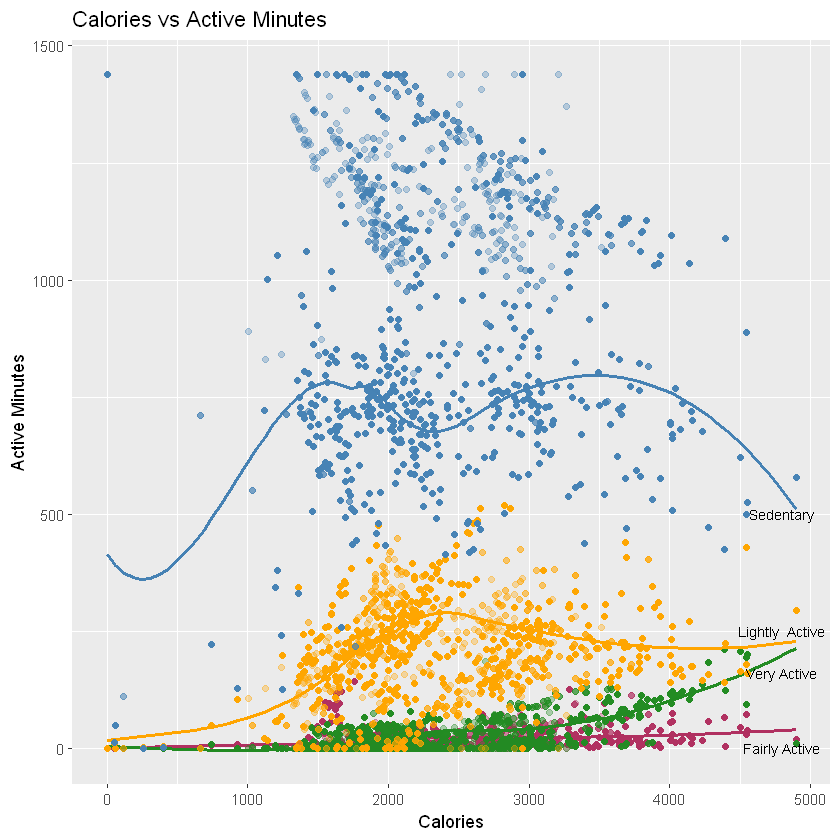

In [42]:
active_minutes_vs_calories <- ggplot(data = merged_data) + 
  geom_point(mapping=aes(x=Calories, y=FairlyActiveMinutes), color = "maroon", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x, mapping=aes(x=Calories, y=FairlyActiveMinutes, color=FairlyActiveMinutes), color = "maroon", se = FALSE) +
  
  geom_point(mapping=aes(x=Calories, y=VeryActiveMinutes), color = "forestgreen", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=Calories, y=VeryActiveMinutes, color=VeryActiveMinutes), color = "forestgreen", se = FALSE) +
  
  geom_point(mapping=aes(x=Calories, y=LightlyActiveMinutes), color = "orange", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=Calories, y=LightlyActiveMinutes, color=LightlyActiveMinutes), color = "orange", se = FALSE) +
  
  geom_point(mapping=aes(x=Calories, y=SedentaryMinutes), color = "steelblue", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=Calories, y=SedentaryMinutes, color=SedentaryeMinutes), color = "steelblue", se = FALSE) +
  
  annotate("text", x=4800, y=160, label="Very Active", color="black", size=3)+
  annotate("text", x=4800, y=0, label="Fairly Active", color="black", size=3)+
  annotate("text", x=4800, y=500, label="Sedentary", color="black", size=3)+
  annotate("text", x=4800, y=250, label="Lightly  Active", color="black", size=3)+
  labs(x = "Calories", y = "Active Minutes", title="Calories vs Active Minutes")

active_minutes_vs_calories

Comparing the four active levels to the total steps, we see most data is concentrated on users who take about 5000 to 15000 steps a day. These users spent an average between 8 to 13 hours in sedentary, 5 hours in lightly active, and 1 to 2 hour for fairly and very active.

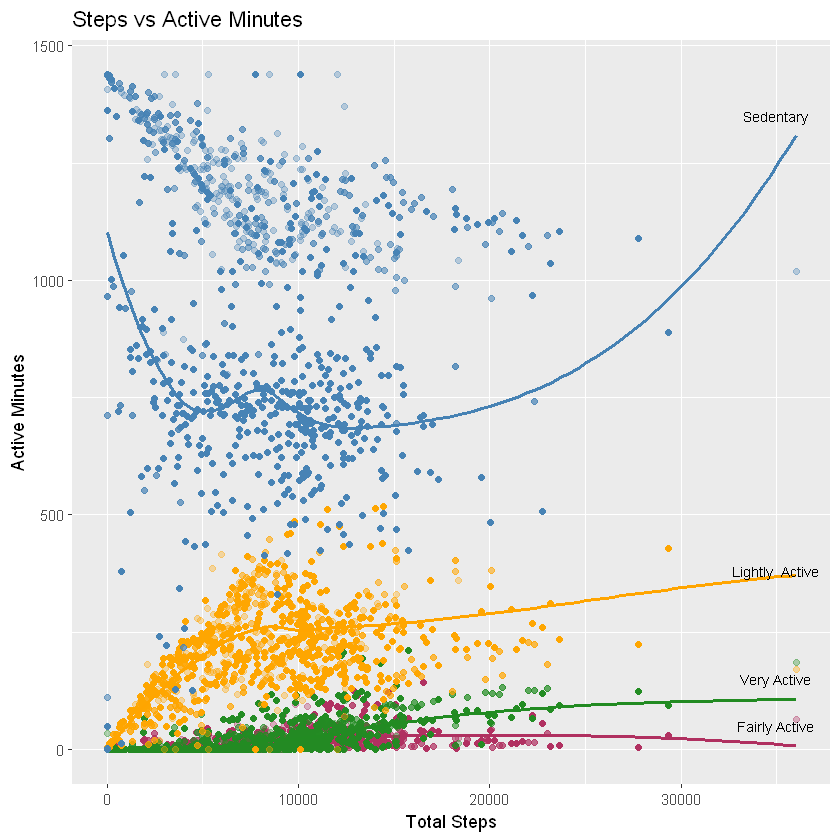

In [43]:
active_minutes_vs_steps <- ggplot(data = merged_data) + 
  geom_point(mapping=aes(x=TotalSteps, y=FairlyActiveMinutes), color = "maroon", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x, mapping=aes(x=TotalSteps, y=FairlyActiveMinutes, color=FairlyActiveMinutes), color = "maroon", se = FALSE) +
  
  geom_point(mapping=aes(x=TotalSteps, y=VeryActiveMinutes), color = "forestgreen", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=TotalSteps, y=VeryActiveMinutes, color=VeryActiveMinutes), color = "forestgreen", se = FALSE) +
  
  geom_point(mapping=aes(x=TotalSteps, y=LightlyActiveMinutes), color = "orange", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=TotalSteps, y=LightlyActiveMinutes, color=LightlyActiveMinutes), color = "orange", se = FALSE) +
  
   geom_point(mapping=aes(x=TotalSteps, y=SedentaryMinutes), color = "steelblue", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=TotalSteps, y=SedentaryMinutes, color=SedentaryMinutes), color = "steelblue", se = FALSE) +
  
  annotate("text", x=35000, y=150, label="Very Active", color="black", size=3)+
  annotate("text", x=35000, y=50, label="Fairly Active", color="black", size=3)+
  annotate("text", x=35000, y=1350, label="Sedentary", color="black", size=3)+
  annotate("text", x=35000, y=380, label="Lightly  Active", color="black", size=3)+
  labs(x = "Total Steps", y = "Active Minutes", title="Steps vs Active Minutes")

active_minutes_vs_steps

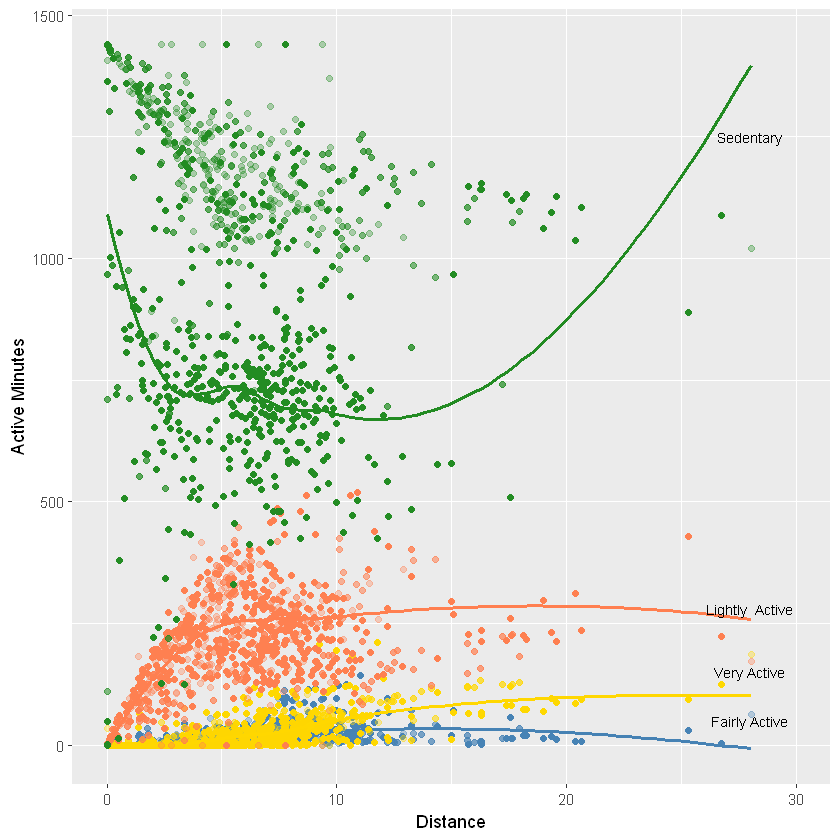

In [44]:
active_minutes_vs_distance <- ggplot(data = merged_data) + 
  geom_point(mapping=aes(x=TotalDistance, y=FairlyActiveMinutes), color = "steelblue", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x, mapping=aes(x=TotalDistance, y=FairlyActiveMinutes, color=FairlyActiveMinutes), color = "steelblue", se = FALSE) +
  
  geom_point(mapping=aes(x=TotalDistance, y=VeryActiveMinutes), color = "gold", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=TotalDistance, y=VeryActiveMinutes, color=VeryActiveMinutes), color = "gold", se = FALSE) +
  
  geom_point(mapping=aes(x=TotalDistance, y=LightlyActiveMinutes), color = "coral", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=TotalDistance, y=LightlyActiveMinutes, color=LightlyActiveMinutes), color = "coral", se = FALSE) +
  
   geom_point(mapping=aes(x=TotalDistance, y=SedentaryMinutes), color = "forestgreen", alpha = 1/3) +
  geom_smooth(method = loess,formula =y ~ x,mapping=aes(x=TotalDistance, y=SedentaryMinutes, color=SedentaryMinutes), color = "forestgreen", se = FALSE) +
  
  scale_x_continuous(limits = c(0, 30))+
  
  annotate("text", x=28, y=150, label="Very Active", color="black", size=3)+
  annotate("text", x=28, y=50, label="Fairly Active", color="black", size=3)+
  annotate("text", x=28, y=1250, label="Sedentary", color="black", size=3)+
  annotate("text", x=28, y=280, label="Lightly  Active", color="black", size=3)+
  labs(x = "Distance", y = "Active Minutes")

active_minutes_vs_distance

###### Analysis on sleep

In [45]:
#Sleep time in hours instead of minutes

sleep_day_in_hour <-sleep_day
sleep_day_in_hour$TotalMinutesAsleep <- sleep_day_in_hour$TotalMinutesAsleep/60
sleep_day_in_hour$TotalTimeInBed <- sleep_day_in_hour$TotalTimeInBed/60
head(sleep_day_in_hour)


Id         SleepDay              TotalSleepRecords TotalMinutesAsleep
1 1503960366 4/12/2016 12:00:00 AM 1                  5.450000         
2 1503960366 4/13/2016 12:00:00 AM 2                  6.400000         
3 1503960366 4/15/2016 12:00:00 AM 1                  6.866667         
4 1503960366 4/16/2016 12:00:00 AM 2                  5.666667         
5 1503960366 4/17/2016 12:00:00 AM 1                 11.666667         
6 1503960366 4/19/2016 12:00:00 AM 1                  5.066667         
  TotalTimeInBed
1  5.766667     
2  6.783333     
3  7.366667     
4  6.116667     
5 11.866667     
6  5.333333

In [46]:
# Check for any sleep outliers. 

# of times user sleep more than 10 hours or less than 1  

sum(sleep_day_in_hour$TotalMinutesAsleep > 9)
sum(sleep_day_in_hour$TotalTimeInBed > 9)
sum(sleep_day_in_hour$TotalMinutesAsleep < 2)
sum(sleep_day_in_hour$TotalTimeInBed < 2)


[1] 39

[1] 87

[1] 15

[1] 12

Comparing the four active levels to the total steps, we see most data is concentrated on users who take about 5000 to 15000 steps a day. These users spent an average between 8 to 13 hours in sedentary, 5 hours in lightly active, and 1 to 2 hour for fairly and very active.

In [47]:
awake_in_bed <- mutate(sleep_day, AwakeTime = TotalTimeInBed - TotalMinutesAsleep)
awake_in_bed <- awake_in_bed %>% 
  filter(AwakeTime >= 55) %>% 
  group_by(Id) %>% 
  arrange(AwakeTime, desc=TRUE) 
  
n_distinct(awake_in_bed$Id)

#13 users spend more than 55 minutes in bed before falling alseep

#How many minutes an user sleep may not correlate well with how actively they are, but sedentary time account for about 80% of during the day


[1] 13

Warning message:
"Removed 971 rows containing missing values or values outside the scale range (`geom_point()`)."


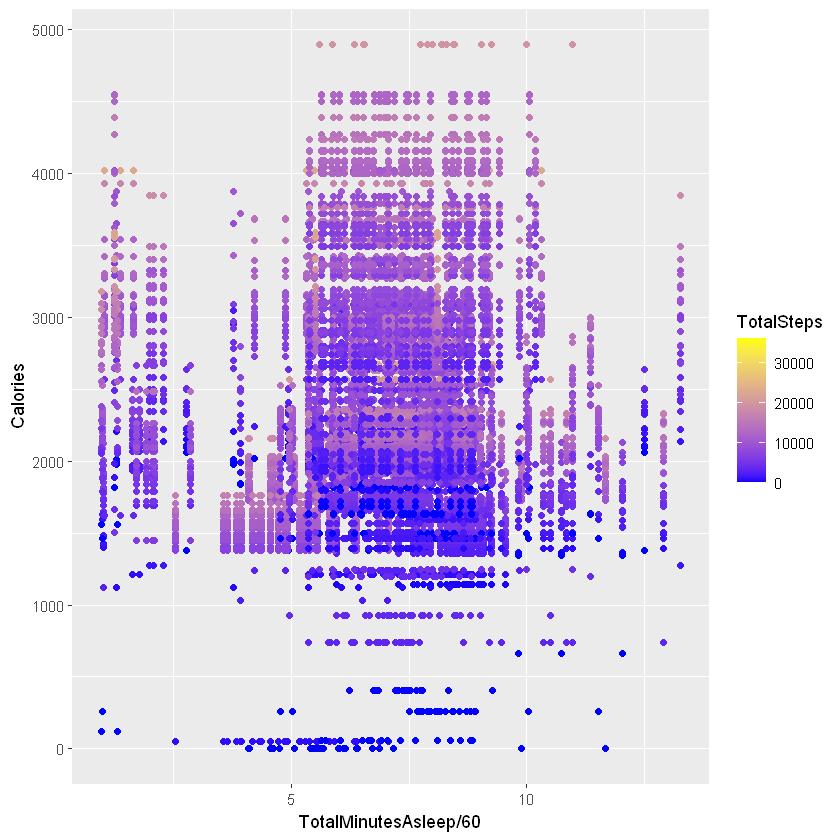

In [48]:
# Majority of the users sleep between 5 to 10 hours burns around 1500 to 4500 calories a day.

ggplot(data=merged_data, aes(x=TotalMinutesAsleep/60, y=Calories, color=TotalSteps))+ 
  geom_point()+
  scale_color_gradient(low="blue", high="yellow")


Warning message:
"Removed 971 rows containing missing values or values outside the scale range (`geom_point()`)."


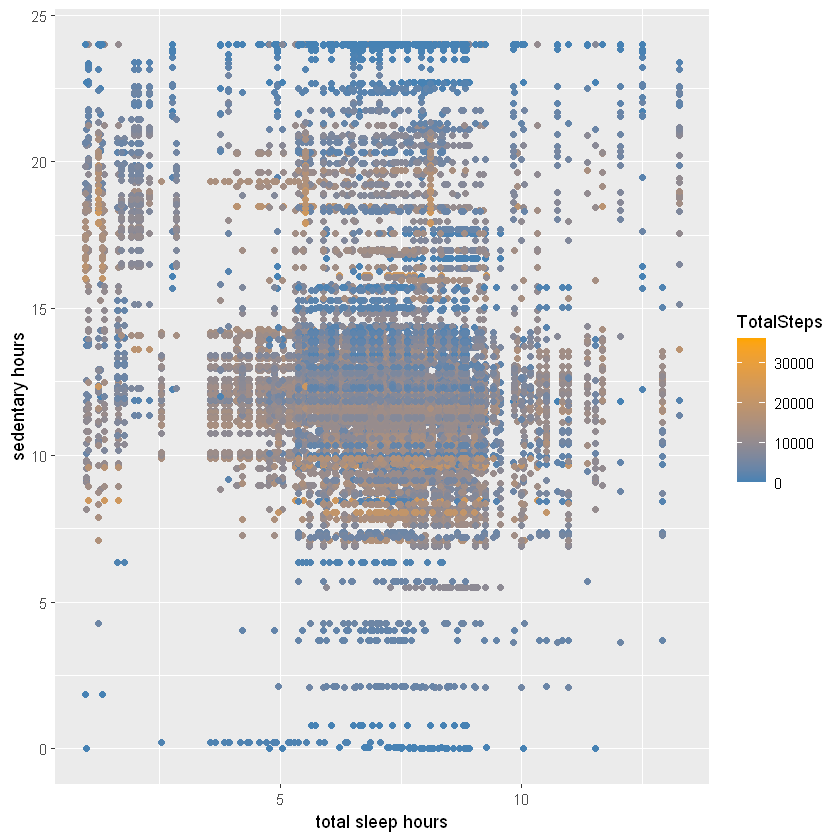

In [49]:
# Majority of the users sleep between 5 to 10 hours spend 7 to 24 hours in sedentary and only 0 to 2 hours in very active mode. 

ggplot(data=merged_data, aes(x=TotalMinutesAsleep/60 ,y=SedentaryMinutes/60, color=TotalSteps))+ 
  geom_point()+
  scale_color_gradient(low="steelblue", high="orange") +
  ylab("sedentary hours")+
  xlab("total sleep hours")

Warning message:
"Removed 971 rows containing missing values or values outside the scale range (`geom_point()`)."


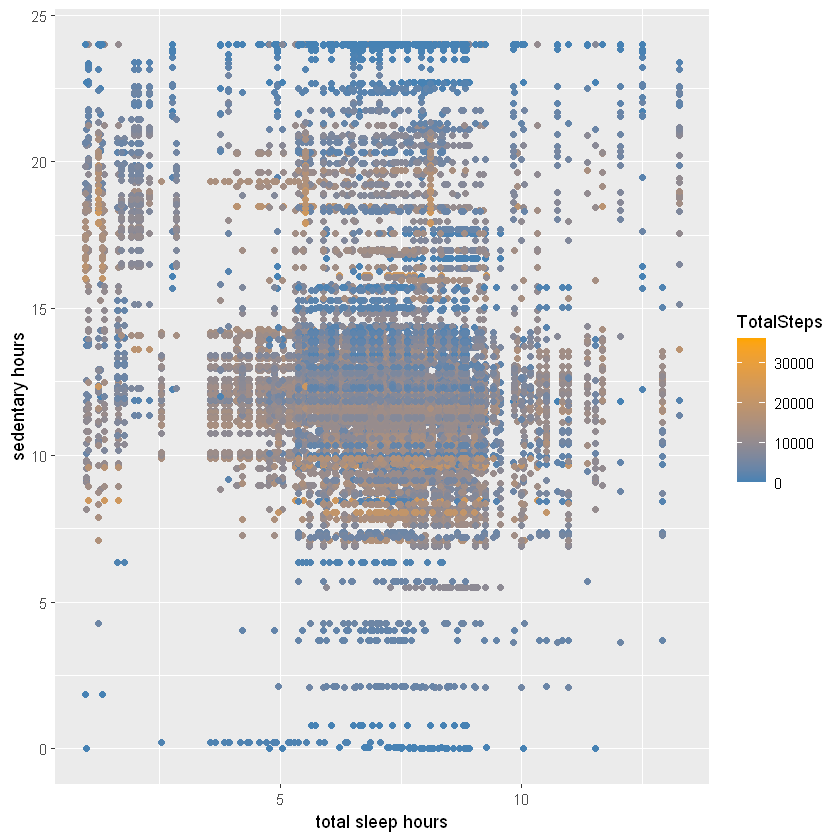

In [50]:
# Majority of the users sleep between 5 to 10 hours spend 7 to 24 hours in sedentary and only 0 to 2 hours in very active mode. 

ggplot(data=merged_data, aes(x=TotalMinutesAsleep/60 ,y=SedentaryMinutes/60, color=TotalSteps))+ 
  geom_point()+
  scale_color_gradient(low="steelblue", high="orange") +
  ylab("sedentary hours")+
  xlab("total sleep hours")

How about calories vs asleep? Do people sleep more burn less calories? Plotting the two variables we can see that there is not much a correlation.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 971 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?"
Warning message:
"Removed 971 rows containing missing values or values outside the scale range (`geom_point()`)."


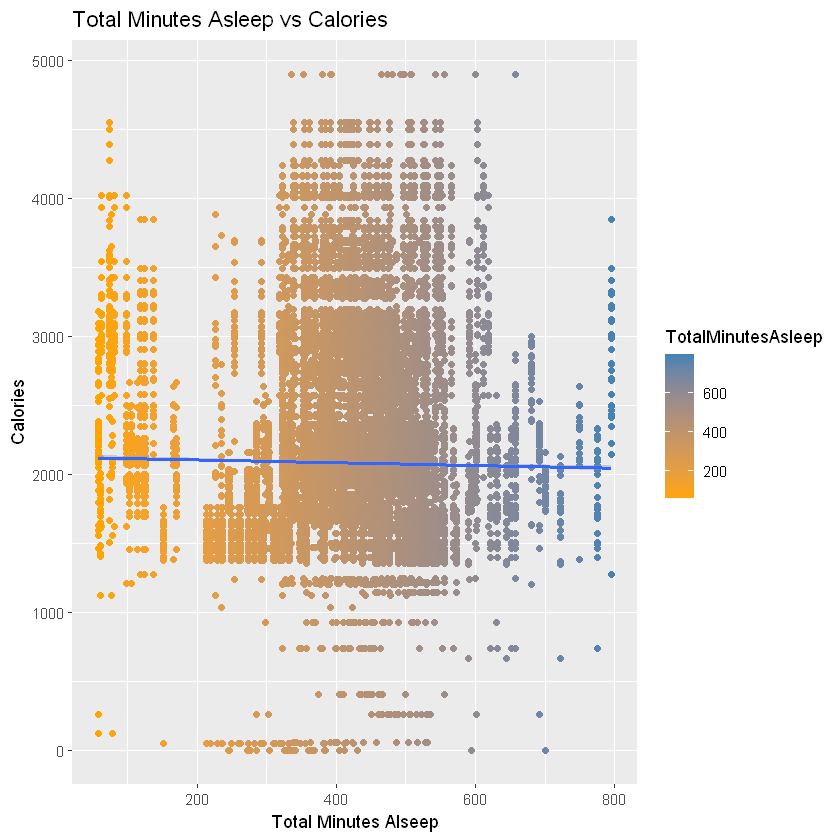

In [51]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y = Calories, color=TotalMinutesAsleep))+ 
  geom_point()+ 
  labs(title="Total Minutes Asleep vs Calories")+
  xlab("Total Minutes Alseep")+
  stat_smooth(method=lm)+
  scale_color_gradient(low="orange", high="steelblue")

### 5,6: Share and Act

#### Conclusion based on our analysis:

* Sedentary make up a significant portion, 81% of users daily active minutes. Users spend on avg 12 hours a day in sedentary minutes, 4 hours lightly active, and only half-hour in fairly+very active!
* We see the most change on Saturday: users take more steps, burn more calories, and spend less time sedentary. Sunday is the most "lazy" day for users.
* 54% of the users who recorded their sleep data spent 55 minutes awake in bed before falling asleep.
* There is a strong negative correlation (-0.6) between total time asleep and sedentary minutes. The longer the sedentary time, the stronger the association with poor sleep quality and duration.
* Tuesday is the most popular day for work outs.
* There is a strong correlation between total steps taken and calories burned.
* Saturday is the day users get the most sleep in a week.
* Users takes the most steps from 5 PM to 7 PM Users who are sedentary take minimal steps and burn 1500 to 2500 calories compared to users who are more active, take more steps, but still burn similar calories.

#### Marketing recommendations to expand globally:

* Obtain more data for an accurate analysis, encouraging users to use a wifi-connected scale instead of manual weight entries.

* Educational healthy style campaign encourages users to have short active exercises during the week, longer during the weekends, especially on Sunday where we see the lowest steps and most sedentary minutes.

* Educational healthy style campaign can pair with a point-award incentive system. Users completing the whole week's exercise will receive Bellabeat points on products/memberships.

* Incorporating some of the features that can be a great way to encourage more physical activity and walking:

    * Goal setting (target to encourage users to aim for 10,000 steps per day or more), receiving reminders throughout the day to reach those goals

    * Gamification elements, such as challenges or rewards, reminders, or alerts throughout the day to encourage them to take breaks from sedentary activities.

    * Coaching and feedback features that can provide users with personalized recommendations for how to improve their activity levels.

* The product, such as Leaf wellness tracker, can beat or vibrate after a prolonged period of sedentary minutes, signaling the user it's time to get active! Similarly, it can also remind the user it's time to sleep after sensing a prolonged awake time in bed.

* Bellabeat can encourage people to go to sleep earlier to get adequate amount and good quality of sleep by providing reminders and notifications:

    * Set a bedtime reminder: Fitness trackers can be set to remind users to go to bed at a certain time each night. This can help establish a regular sleep schedule and promote healthier sleep habits.

    * Monitor sleep patterns: Fitness trackers can track sleep patterns and provide insights into the quality and duration of sleep.

    * Personalized recommendations for improving sleep habits. This might include suggestions for adjusting bedtime routines, reducing caffeine consumption, or increasing physical activity during the day.
    
* Knowing that Tuesday is a popular workout day, Bellabeat could provide personalized workout recommendations for users based on their fitness goals, offer Tuesday-specific workouts to encourage users to stick to their routine, create challenges or competitions specifically for Tuesdays to encourage users to work out and stay motivated.

* Since Saturday is the day users get the most sleep in a week, Bellabeat could offer tips and guidance to help users maintain good sleep habits throughout the week and improve sleep quality.

* Promote weight management: Given that very few users report weight-related information, Bellabeat could focus on promoting the benefits of weight management and highlight how its products can help users monitor and track their weight goals.



## Thank You